In [ ]:
###                                                                     UTS BENGKEL KODING
### Nama : M. Syahputra Yosa R.
### NIM  : A11.2020.13099

In [ ]:
# 1
import pandas as pd

# Membaca dataset dari file CSV
df = pd.read_csv("seattle-weather.csv")

# Menampilkan 15 baris pertama dataset
print(df.head(15))

In [ ]:
#2
import pandas as pd

# Membaca dataset dari file CSV
df = pd.read_csv("seattle-weather.csv")

# Menampilkan informasi dataset
print("Informasi dataset sebelum pembersihan:")
print(df.info())

# Menghapus nilai-nilai kosong
df.dropna(inplace=True)

# Menghapus kolom "date"
df.drop("date", axis=1, inplace=True)

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Menampilkan informasi dataset setelah pembersihan
print("\nInformasi dataset setelah pembersihan:")
print(df.info())

In [ ]:
#3
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset dari file CSV
df = pd.read_csv("seattle-weather.csv")

# Menampilkan distribusi target-class dalam diagram pie
class_counts = df['weather'].value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Target-Class Distribution (Weather)')
plt.axis('equal')  # Membuat diagram pie menjadi lingkaran
plt.show()


In [ ]:
#4

target_names = df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Membuat kolom target dengan mengganti nilai pada kolom 'weather'
target = df['weather'].replace({
    'drizzle': 0,
    'rain': 1,
    'snow': 2,
    'fog': 3,
    'sun': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'],
c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names,
loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'],
c=target) 
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names,
loc="lower right", title="Classes")


fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()


In [2]:
#5
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca dataset dari file CSV
df = pd.read_csv("seattle-weather.csv")

# Memisahkan fitur (X) dan target (y)
x = df.drop(columns=['weather'])  # Menghilangkan kolom target dari fitur
y = df['weather']

# Membagi dataset menjadi train-set (70%) dan test-set (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

# Output ukuran train-set dan test-set
print("Ukuran train-set (x_train):", x_train.shape)
print("Ukuran test-set (x_test):", x_test.shape)
print("Ukuran train-set (y_train):", y_train.shape)
print("Ukuran test-set (y_test):", y_test.shape)

Ukuran train-set (x_train): (1022, 5)
Ukuran test-set (x_test): (439, 5)
Ukuran train-set (y_train): (1022,)
Ukuran test-set (y_test): (439,)


In [ ]:
#6
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names,
colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names,
colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20,
fontweight="bold")
plt.tight_layout()

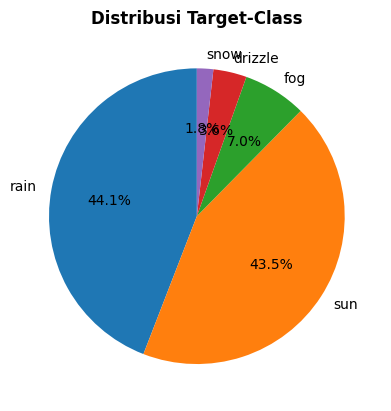

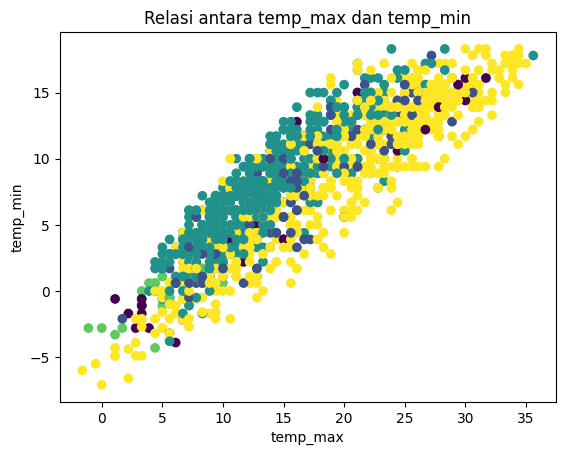

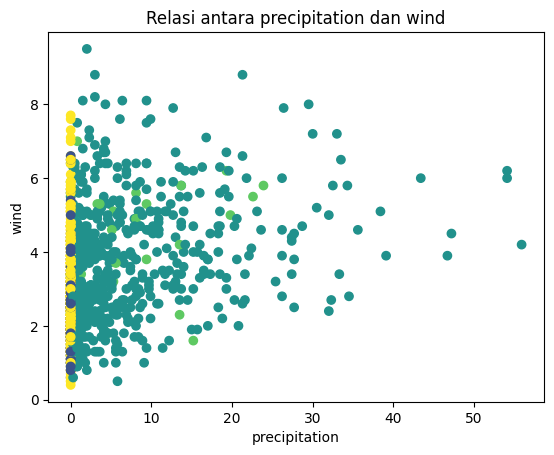

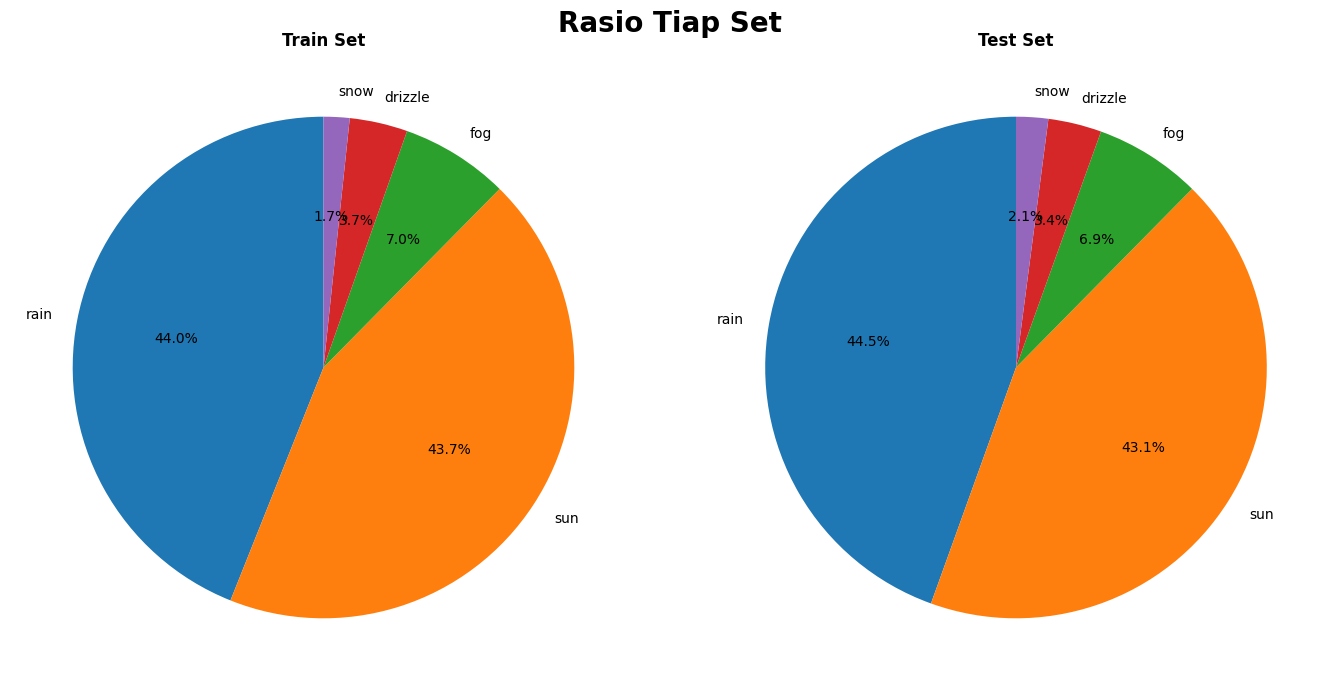

0:	learn: 1.3669515	total: 3.17ms	remaining: 3.17s
1:	learn: 1.2163949	total: 5.19ms	remaining: 2.59s
2:	learn: 1.1079858	total: 7.67ms	remaining: 2.55s
3:	learn: 1.0189330	total: 10.5ms	remaining: 2.62s
4:	learn: 0.9476738	total: 12.6ms	remaining: 2.51s
5:	learn: 0.8863363	total: 15.1ms	remaining: 2.49s
6:	learn: 0.8360088	total: 17.2ms	remaining: 2.44s
7:	learn: 0.7984006	total: 19.5ms	remaining: 2.42s
8:	learn: 0.7611229	total: 22.1ms	remaining: 2.43s
9:	learn: 0.7313177	total: 24.2ms	remaining: 2.39s
10:	learn: 0.7011461	total: 26.2ms	remaining: 2.36s
11:	learn: 0.6757492	total: 28.5ms	remaining: 2.35s
12:	learn: 0.6530904	total: 30.9ms	remaining: 2.35s
13:	learn: 0.6353085	total: 33.1ms	remaining: 2.33s
14:	learn: 0.6194226	total: 35.3ms	remaining: 2.32s
15:	learn: 0.6044859	total: 37.4ms	remaining: 2.3s
16:	learn: 0.5924298	total: 39.6ms	remaining: 2.29s
17:	learn: 0.5803139	total: 41.4ms	remaining: 2.26s
18:	learn: 0.5697214	total: 43.4ms	remaining: 2.24s
19:	learn: 0.5609072	to

In [3]:
#7

import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Membaca dataset dan menghapus nilai kosong serta kolom "date"
df = pd.read_csv("seattle-weather.csv")
df.dropna(inplace=True)
df.drop(columns=['date'], inplace=True)

# Memeriksa dan menghapus data yang memiliki nilai duplikat
df.drop_duplicates(inplace=True)

# Visualisasi distribusi target-class dengan diagram pie
class_counts = df['weather'].value_counts()
labels = class_counts.index
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Target-Class", fontweight="bold")
plt.show()

# Visualisasi relasi fitur temp_max dan temp_min
plt.scatter(df['temp_max'], df['temp_min'], c=df['weather'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('temp_max')
plt.ylabel('temp_min')
plt.title('Relasi antara temp_max dan temp_min')
plt.show()

# Visualisasi relasi fitur precipitation dan wind
plt.scatter(df['precipitation'], df['wind'], c=df['weather'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('precipitation')
plt.ylabel('wind')
plt.title('Relasi antara precipitation dan wind')
plt.show()

# Membagi dataset menjadi train-set dan test-set (70% train-set, 30% test-set)
X = df.drop(columns=['weather'])
y = df['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualisasi rasio tiap set (train dan test)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Train dataset
class_counts_train = y_train.value_counts()
labels_train = class_counts_train.index
axs[0].pie(class_counts_train, labels=labels_train, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

# Test dataset
class_counts_test = y_test.value_counts()
labels_test = class_counts_test.index
axs[1].pie(class_counts_test, labels=labels_test, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

# Membuat model CatBoost Classifier
catboost_classifier = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', random_state=42)
catboost_classifier.fit(X_train, y_train)

# Melakukan prediksi
y_pred = catboost_classifier.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Prediksi dengan CatBoost Classifier: {accuracy} atau {accuracy*100:.2f}%")
